In [1]:
import pandas as pd
df=pd.read_csv("c:/data/titanic/data.csv")
df.head()

,survived,sex,age,sibsp,parch,fare,adult_male,alone,pclass_1,pclass_2,...,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,embarked_C,embarked_Q,embarked_S
0,0,1,22.0,1,0,7.2500,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0,38.0,1,0,71.2833,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
2,1,0,26.0,0,0,7.9250,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
3,1,0,35.0,1,0,53.1000,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,0,1,35.0,0,0,8.0500,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1


In [2]:
train_cols=df.columns[1:]
print(train_cols)

Index(['sex', 'age', 'sibsp', 'parch', 'fare', 'adult_male', 'alone',
       'pclass_1', 'pclass_2', 'pclass_3', 'deck_A', 'deck_B', 'deck_C',
       'deck_D', 'deck_E', 'deck_F', 'deck_G', 'embarked_C', 'embarked_Q',
       'embarked_S'],
      dtype='object')


In [3]:
X=df[train_cols]
y=df["survived"]
print(df[train_cols].head())
print(y.head())

   sex   age  sibsp  parch     fare  adult_male  alone  pclass_1  pclass_2  \
0    1  22.0      1      0   7.2500           1      0         0         0   
1    0  38.0      1      0  71.2833           0      0         1         0   
2    0  26.0      0      0   7.9250           0      1         0         0   
3    0  35.0      1      0  53.1000           0      0         1         0   
4    1  35.0      0      0   8.0500           1      1         0         0   

   pclass_3  deck_A  deck_B  deck_C  deck_D  deck_E  deck_F  deck_G  \
0         1       0       0       1       0       0       0       0   
1         0       0       0       1       0       0       0       0   
2         1       0       0       1       0       0       0       0   
3         0       0       0       1       0       0       0       0   
4         1       0       0       1       0       0       0       0   

   embarked_C  embarked_Q  embarked_S  
0           0           0           1  
1           1           

In [5]:
from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)

X_samp = pd.DataFrame(data=X_sample,columns=train_cols )
y_samp = pd.DataFrame(data=y_sample,columns=['survived'])
df2=pd.concat([X_samp,y_samp],axis=1)

In [6]:
df2["survived"].value_counts()

0    342
1    342
Name: survived, dtype: int64

In [7]:
X=X_samp[train_cols]
y=y_samp['survived']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, stratify=y,random_state=10)
X_train.shape, X_test.shape

((547, 20), (137, 20))

<AxesSubplot:>

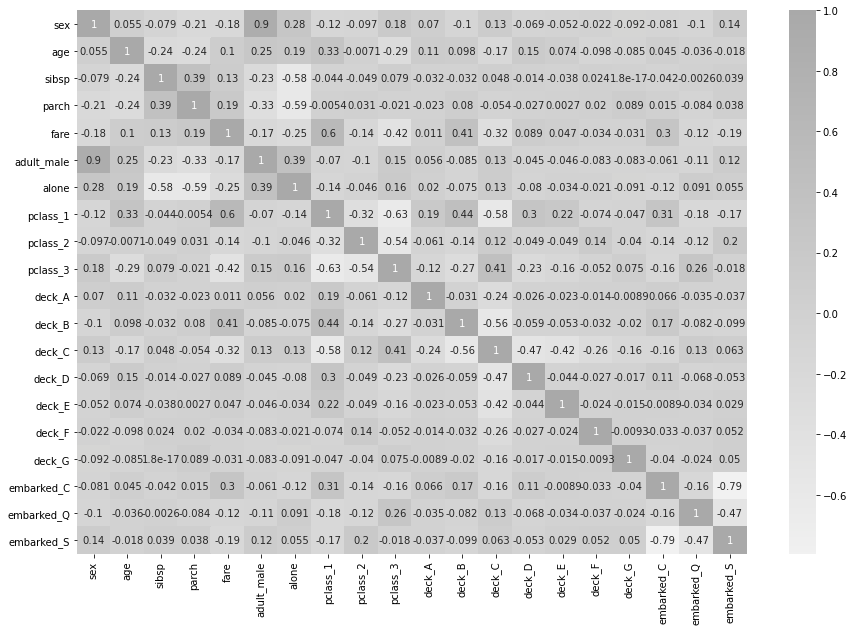

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
cmap=sns.light_palette("darkgray", as_cmap=True)
sns.heatmap(X.corr(), annot=True, cmap=cmap)

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif["VIF Factor"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"]=X.columns
vif

C:\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,6.855242,sex
1,1.519595,age
2,1.728773,sibsp
3,1.686382,parch
4,1.882117,fare
5,7.868527,adult_male
6,2.303384,alone
7,inf,pclass_1
8,inf,pclass_2
9,inf,pclass_3


In [11]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=5000)
rfe=RFE(model,15)
fit=rfe.fit(X,y)

C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [12]:
print("선택된 변수 갯수: %d" % fit.n_features_) 
print("변수 선택 여부: %s" % fit.support_) 
print("변수 랭킹: %s" % fit.ranking_) 
print('최종 선택 변수":',X.columns[fit.support_])

선택된 변수 갯수: 15
변수 선택 여부: [ True False  True  True False  True  True  True False  True  True  True
  True False  True  True  True  True False  True]
변수 랭킹: [1 4 1 1 6 1 1 1 3 1 1 1 1 5 1 1 1 1 2 1]
최종 선택 변수": Index(['sex', 'sibsp', 'parch', 'adult_male', 'alone', 'pclass_1', 'pclass_3',
       'deck_A', 'deck_B', 'deck_C', 'deck_E', 'deck_F', 'deck_G',
       'embarked_C', 'embarked_S'],
      dtype='object')


In [13]:
X_train.shape

(547, 20)

In [15]:
X1 = [[0, 0, 1],[0, 1, 0],[1, 0, 0],[0, 1, 1],[0, 1, 0],[0, 1, 1]]

In [16]:
from sklearn.feature_selection import VarianceThreshold
sel= VarianceThreshold(threshold=(0.8 * (1-0.8)))
sel.fit_transform(X1)

array([[0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1]])

In [17]:
selector= VarianceThreshold(threshold=(0.8 * (1 - 0.8)))
X_train_sel=selector.fit_transform(X_train)
X_test_sel=selector.transform(X_test)
X_train_sel.shape

(547, 12)

In [18]:
from sklearn.feature_selection import chi2,SelectKBest

selector1=SelectKBest(chi2, k=15)
X_train1=selector1.fit_transform(X_train,y_train)
X_test1=selector1.transform(X_test)

In [19]:
X_train1.shape

(547, 15)

In [20]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

RFselector= SelectFromModel(estimator=RandomForestClassifier()).fit(X,y)
GBMselector=SelectFromModel(estimator=GradientBoostingClassifier()).fit(X,y)
LRselector= SelectFromModel(estimator=LogisticRegression(max_iter=1000)).fit(X,y)

columns=X.columns

sel1=columns[RFselector.get_support()]
sel2=columns[LRselector.get_support()]
sel3=columns[GBMselector.get_support()]
print(sel1)
print(sel2)
print(sel3)
print(list(set(sel1) & set(sel2) & set(sel3)))

Index(['sex', 'age', 'fare', 'adult_male'], dtype='object')
Index(['sex', 'sibsp', 'adult_male', 'pclass_1', 'pclass_3', 'deck_A',
       'deck_C', 'deck_E', 'deck_G'],
      dtype='object')
Index(['age', 'fare', 'adult_male', 'pclass_3'], dtype='object')
['adult_male']
